My Functions:

Importing all the Libraries at one go

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
from sklearn.ensemble import ExtraTreesClassifier
import operator
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

**Data Cleaning**

First task at hand is data cleaning. Loading Data from dataset and cleaning it up.

In [82]:
# load train dataframe
df_train = pd.read_csv("C:/Users/Maitreya/OneDrive/Desktop/Upskill Campus and UCT internship/Project9_smart-city-traffic-patterns/Dataset/train.csv")
df_train.info()
# load test dataframe
df_test = pd.read_csv("C:/Users/Maitreya/OneDrive/Desktop/Upskill Campus and UCT internship/Project9_smart-city-traffic-patterns/Dataset/test.csv")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11808 entries, 0 to 11807
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  11808 non-null  object
 1   Junction  11808 non-null  int64 
 2   ID        11808 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 276.9+ KB


In [101]:
def datetounix(df):
    # Initialising unixtime list
    unixtime = []
    
    # Running a loop for converting Date to seconds
    for date in df['DateTime']:
        unixtime.append(time.mktime(date.timetuple()))
    
    # Replacing Date with unixtime list
    df['DateTime'] = unixtime
    return(df)

In [106]:
# Converting to datetime
df_train['DateTime'] = pd.to_datetime(df_train['DateTime'])
df_test['DateTime'] = pd.to_datetime(df_test['DateTime'])
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
 3   ID        48120 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11808 entries, 0 to 11807
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  11808 non-null  datetime64[ns]
 1   Junction  11808 non-null  int64         
 2   ID        11808 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 276.9 KB


In [107]:
# Creating features from DateTime for train data
df_train['Year'] = [date.year for date in df_train.DateTime]
df_train['Month'] = [date.month for date in df_train.DateTime]
df_train['Date'] = [date.day for date in df_train.DateTime]
df_train['Hour'] = [date.hour for date in df_train.DateTime]
df_train['DayOfWeek'] = [date.dayofweek for date in df_train.DateTime]
df_train['IsWeekend'] = df_train['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)


# Creating features from DateTime for test data
df_test['Year'] = [date.year for date in df_test.DateTime]
df_test['Month'] = [date.month for date in df_test.DateTime]
df_test['Date'] = [date.day for date in df_test.DateTime]
df_test['Hour'] = [date.hour for date in df_test.DateTime]
df_test['DayOfWeek'] = [date.dayofweek for date in df_test.DateTime]
df_test['IsWeekend'] = df_test['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

In [108]:
df_train

,DateTime,Junction,Vehicles,ID,Year,Month,Date,Hour,DayOfWeek,IsWeekend
0,2015-11-01 00:00:00,1,15,20151101001,2015,11,1,0,6,1
1,2015-11-01 01:00:00,1,13,20151101011,2015,11,1,1,6,1
2,2015-11-01 02:00:00,1,10,20151101021,2015,11,1,2,6,1
3,2015-11-01 03:00:00,1,7,20151101031,2015,11,1,3,6,1
4,2015-11-01 04:00:00,1,9,20151101041,2015,11,1,4,6,1
...,...,...,...,...,...,...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194,2017,6,30,19,4,0
48116,2017-06-30 20:00:00,4,30,20170630204,2017,6,30,20,4,0
48117,2017-06-30 21:00:00,4,16,20170630214,2017,6,30,21,4,0
48118,2017-06-30 22:00:00,4,22,20170630224,2017,6,30,22,4,0


In [109]:
df_test

,DateTime,Junction,ID,Year,Month,Date,Hour,DayOfWeek,IsWeekend
0,2017-07-01 00:00:00,1,20170701001,2017,7,1,0,5,1
1,2017-07-01 01:00:00,1,20170701011,2017,7,1,1,5,1
2,2017-07-01 02:00:00,1,20170701021,2017,7,1,2,5,1
3,2017-07-01 03:00:00,1,20170701031,2017,7,1,3,5,1
4,2017-07-01 04:00:00,1,20170701041,2017,7,1,4,5,1
...,...,...,...,...,...,...,...,...,...
11803,2017-10-31 19:00:00,4,20171031194,2017,10,31,19,1,0
11804,2017-10-31 20:00:00,4,20171031204,2017,10,31,20,1,0
11805,2017-10-31 21:00:00,4,20171031214,2017,10,31,21,1,0
11806,2017-10-31 22:00:00,4,20171031224,2017,10,31,22,1,0


## Visualization

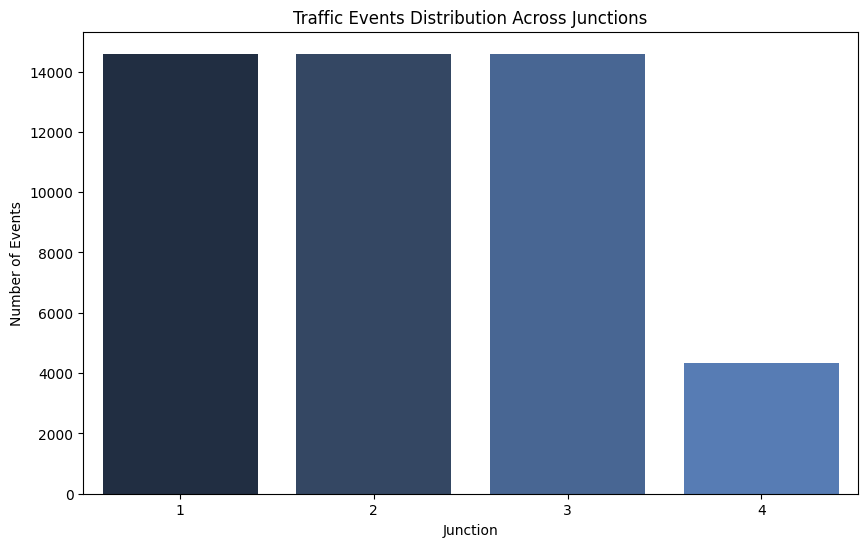

In [110]:
# Distribution across junctions
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='Junction', palette=["#1b2d48","#2c456b","#3c649f","#4779c4"])
plt.title("Traffic Events Distribution Across Junctions")
plt.xlabel("Junction")
plt.ylabel("Number of Events")
plt.show()

Text(0, 0.5, 'Number of Vehicles')

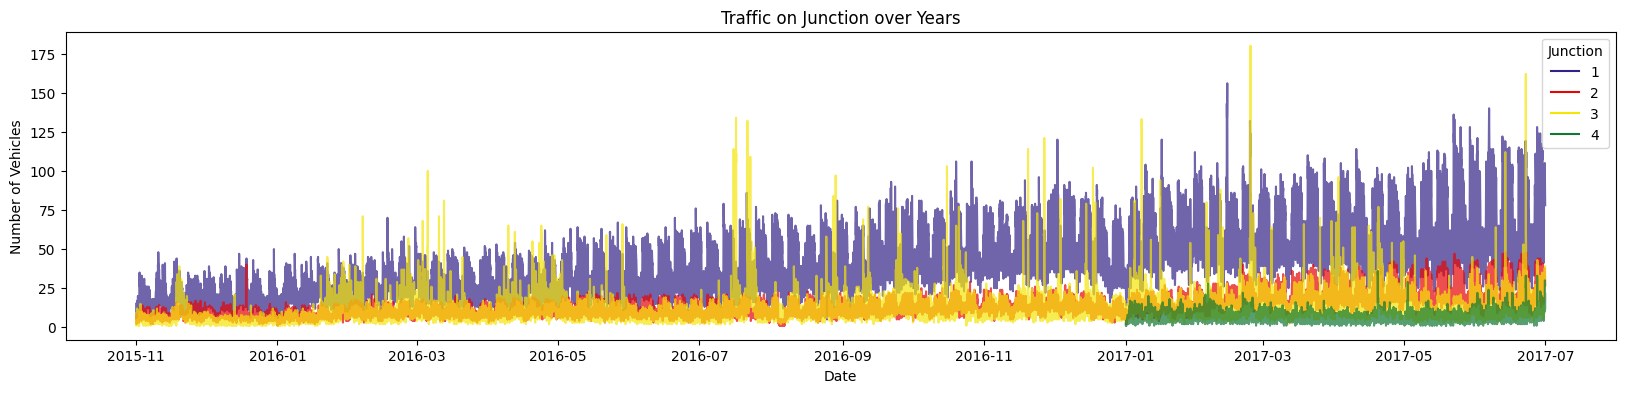

In [111]:
# This code plots the number of vehicles on each junction over the years.
plt.figure(figsize=(20,4))
sns.lineplot(x=df_train['DateTime'], y="Vehicles", data=df_train, hue="Junction", palette=["#332288", "#e60505", "#f5e507", "#117733"], alpha = 0.7)
plt.title('Traffic on Junction over Years')
plt.xlabel('Date')
plt.ylabel('Number of Vehicles')

**Observation**
* Traffic on Junctions has increased over the years.



<Axes: ylabel='Vehicles'>

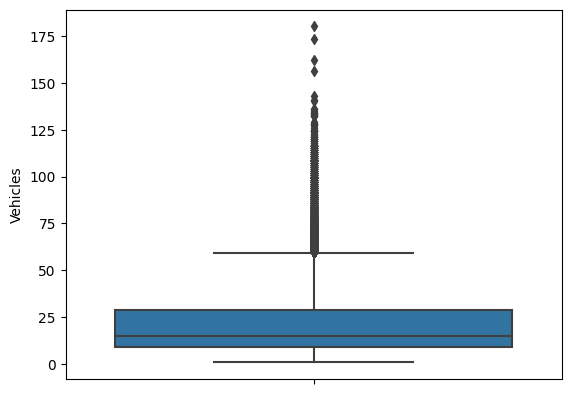

In [112]:
#Box plot for Vehicles
sns.boxplot(y='Vehicles', data = df_train)

**Observation**
* Average number of vehicles is around 25.

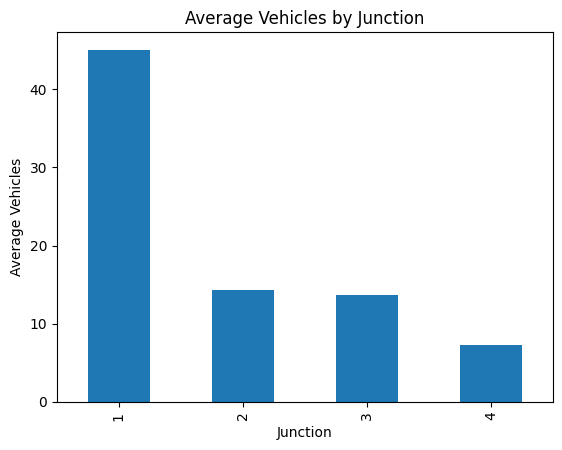

In [113]:
#Distribution of Vehicles by Junction
junction_vehicles =df_train.groupby('Junction')['Vehicles'].mean()
junction_vehicles.plot(kind='bar')
plt.xlabel('Junction')
plt.ylabel('Average Vehicles')
plt.title('Average Vehicles by Junction')
plt.show()

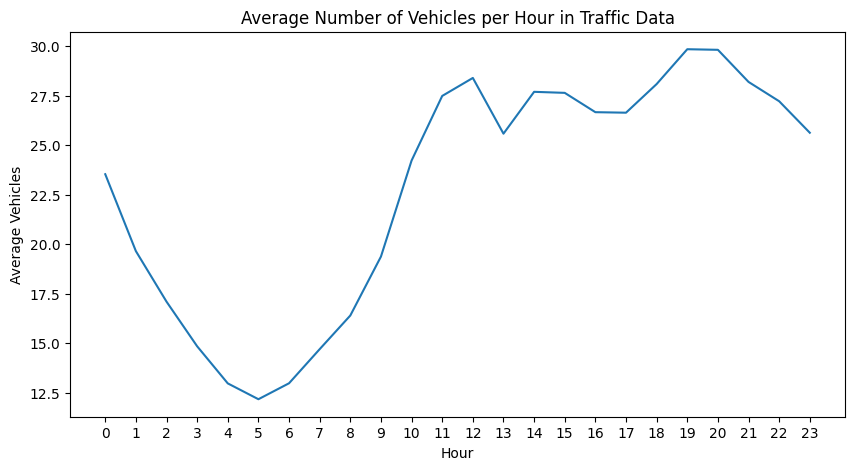

In [114]:
# This code plots the average number of vehicles per hour in the traffic_train dataset.
df_train.groupby('Hour')['Vehicles'].mean().plot(kind='line', figsize=(10,5))
plt.xlabel('Hour')
plt.xticks(range(24))
plt.ylabel('Average Vehicles')
plt.title('Average Number of Vehicles per Hour in Traffic Data')
plt.show()

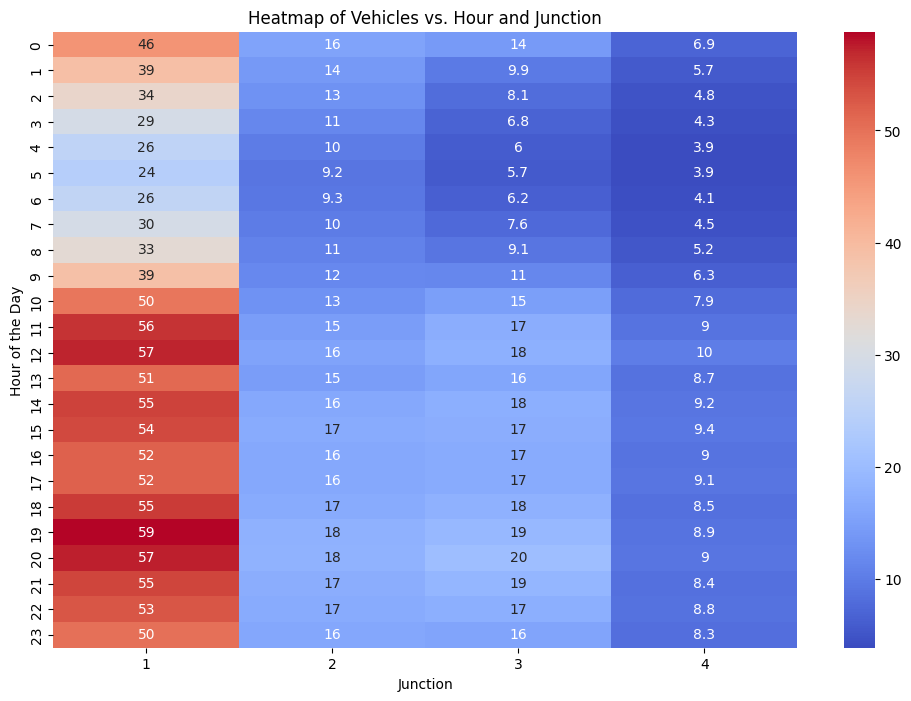

In [115]:
# Heatmap of vehicles vs. hour and junction
pivot_table = df_train.pivot_table(values='Vehicles', index='Hour', columns='Junction', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True)
plt.title('Heatmap of Vehicles vs. Hour and Junction')
plt.xlabel('Junction')
plt.ylabel('Hour of the Day')
plt.show()

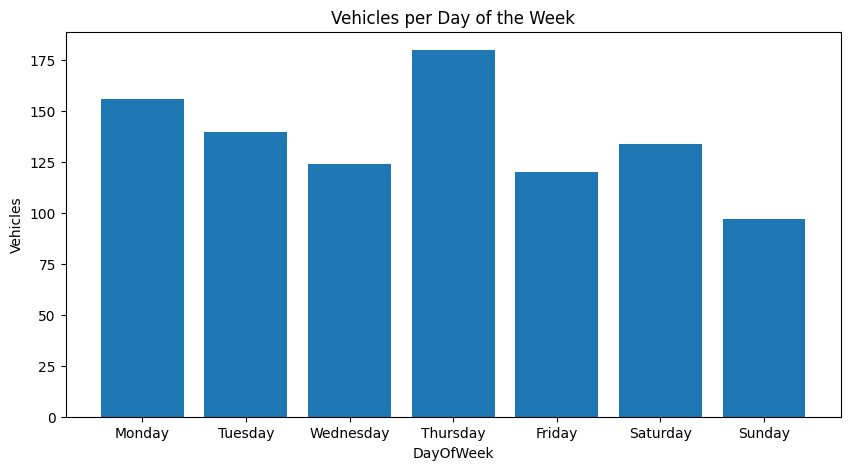

In [116]:
# Bar plot of vehicles per day of the week
days_of_week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

plt.figure(figsize=(10, 5))
plt.bar(df_train['DayOfWeek'], df_train['Vehicles'])
plt.xlabel('DayOfWeek')
plt.ylabel('Vehicles')
plt.xticks(df_train['DayOfWeek'].unique(), labels = days_of_week)
plt.title('Vehicles per Day of the Week')
plt.show()

Predicting the value for test dataset

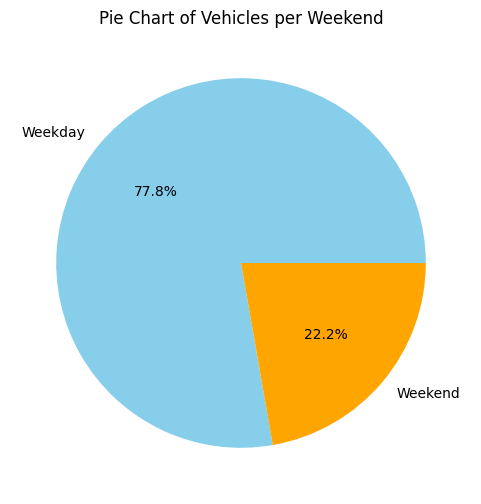

In [117]:
# Pie chart of vehicles per weekend
weekend_data = df_train.groupby('IsWeekend')['Vehicles'].sum()
plt.figure(figsize=(6, 6))
plt.pie(weekend_data, labels=['Weekday', 'Weekend'], autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.title('Pie Chart of Vehicles per Weekend')
plt.show()

## Predicting

Feature ranking:
feature 0 : DateTime (0.375318)
feature 6 : Hour (0.348004)
feature 5 : Date (0.083342)
feature 2 : ID (0.074423)
feature 7 : DayOfWeek (0.054914)
feature 1 : Junction (0.040810)
feature 4 : Month (0.016403)
feature 8 : IsWeekend (0.004416)
feature 3 : Year (0.002369)


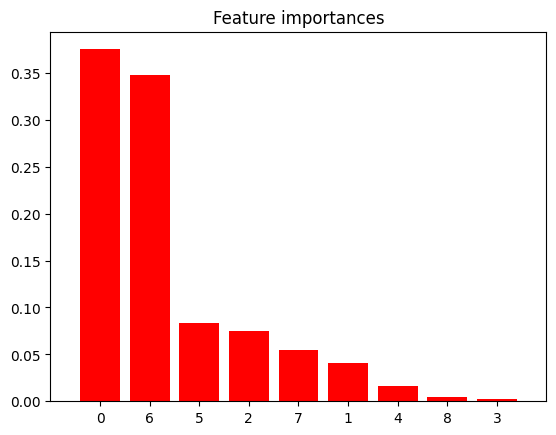

In [118]:
# create an instance for tree feature selection
tree_clf = ExtraTreesClassifier()

# first create arrays holding input and output data
# get the features into an array X
# remove target column from the df
df_train_features = df_train.drop(['Vehicles'], axis=1)

# Convert timestamp to seconds
df_train_features = datetounix(df_train_features)

# store features in X array
X = df_train_features.values

# Store target feature in y array
y = df_train['Vehicles'].values

# fit the model
tree_clf.fit(X, y)

# Preparing variables
importances = tree_clf.feature_importances_
feature_names = df_train_features.columns.tolist()

feature_imp_dict = dict(zip(feature_names, importances))
sorted_features = sorted(feature_imp_dict.items(), key=operator.itemgetter(1), reverse=True)

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("feature %d : %s (%f)" % (indices[f], sorted_features[f][0], sorted_features[f][1]))

# Plot the feature importances of the forest
plt.figure(0)
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

Data Preparation:

In [119]:
######################################## Dropping Features from train set #######################

df_train_features = df_train.drop(['Vehicles', 'Year', 'Month', 'ID'], axis=1)

# Convert timestamp to seconds
df_train_features = datetounix(df_train_features)

######################################## X_test creation for Prediction #################################

# Convert timestamp to seconds
df_test_features = datetounix(df_test.drop(['Year', 'Month', 'ID'], axis=1))

# Create X_test from the test set

X_test = df_test_features.values

# store features in X array
X = df_train_features.values

# store target in y array
y = df_train['Vehicles'].values

Using Decision Tree to Learn

In [120]:
# Data prep
df_solution = pd.DataFrame()
df_solution['ID'] = df_test.ID

# Starting time for time calculations
start_time = time.time()

# Create decision tree object
clf = DecisionTreeClassifier(criterion='gini', random_state = 13)

# fit the model
clf.fit(X, y)

# predict the outcome for testing data
predictions = clf.predict(X_test)

# Prepare Solution dataframe
df_solution['Vehicles'] = predictions
df_solution

,ID,Vehicles
0,20170701001,70
1,20170701011,62
2,20170701021,52
3,20170701031,39
4,20170701041,40
...,...,...
11803,20171031194,11
11804,20171031204,30
11805,20171031214,16
11806,20171031224,22
